In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.drop('Cabin', axis=1, inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(889, 11)

In [16]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(889, 11)

In [19]:
df['Age']=df['Age'].astype(int)

<Axes: xlabel='Sex', ylabel='Age'>

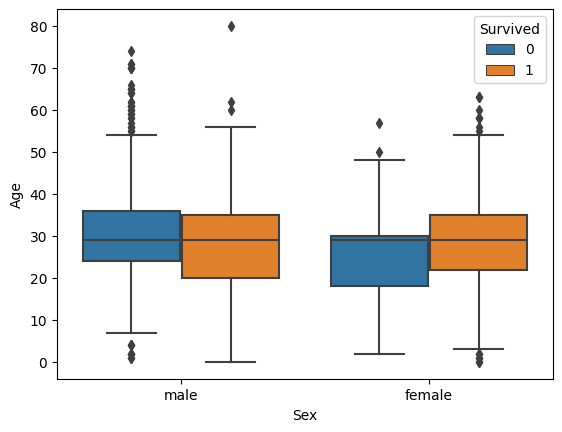

In [20]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)

In [21]:
'''dfmale=df[df['Sex']=="male"]
#dfmale
dfmale_s=dfmale[dfmale['Survived']==1]
#dfmale_s
dfmale_u=dfmale[dfmale['Survived']==0]
#dfmale_u
dffemale=df[df['Sex']=="female"]
#dffemale
dffemale_s=dffemale[dffemale['Survived']==1]
#dffemale_s
dffemale_u=dffemale[dffemale['Survived']==0]
#dffemale_u

q1_ms=dfmale_u['Age'].quantile(0.25)
q3_ms=dfmale_u['Age'].quantile(0.75)
iqr_ms=q3_ms-q1_ms
upper_ms=q3_ms+(1.5*iqr_ms)
lower_ms=q1_ms-(1.5*iqr_ms)

upper_ms,lower_ms

dfmale_u_woutlier=dfmale_u[((dfmale_u['Age']>=upper_ms) | (dfmale_u['Age']<=lower_ms))]
dfmale_u_woutlier

sns.boxplot(x=dfmale_u_woutlier['Age'],data=dfmale_u_woutlier)
'''

'dfmale=df[df[\'Sex\']=="male"]\n#dfmale\ndfmale_s=dfmale[dfmale[\'Survived\']==1]\n#dfmale_s\ndfmale_u=dfmale[dfmale[\'Survived\']==0]\n#dfmale_u\ndffemale=df[df[\'Sex\']=="female"]\n#dffemale\ndffemale_s=dffemale[dffemale[\'Survived\']==1]\n#dffemale_s\ndffemale_u=dffemale[dffemale[\'Survived\']==0]\n#dffemale_u\n\nq1_ms=dfmale_u[\'Age\'].quantile(0.25)\nq3_ms=dfmale_u[\'Age\'].quantile(0.75)\niqr_ms=q3_ms-q1_ms\nupper_ms=q3_ms+(1.5*iqr_ms)\nlower_ms=q1_ms-(1.5*iqr_ms)\n\nupper_ms,lower_ms\n\ndfmale_u_woutlier=dfmale_u[((dfmale_u[\'Age\']>=upper_ms) | (dfmale_u[\'Age\']<=lower_ms))]\ndfmale_u_woutlier\n\nsns.boxplot(x=dfmale_u_woutlier[\'Age\'],data=dfmale_u_woutlier)\n'